# Travaux pratiques 1 

## Année: 2024-2025

## Objectifs
1. Renforcer les concepts à l'aide d'outils comme NumPy et scikit-learn.
2. Appliquer la logique propositionnelle et la tester sur des ensembles de données d'images.
3. Explorer la logique prédicative et la valider sur des ensembles de données d'images.
4. Comprendre les techniques d'analyse de texte, y compris le stemming, la lemmatisation et l'analyse morphologique.

### Exercice 1.0 [★]

Testez le notebook Python Jupyter [rappels](./TP0.ipynb) et familiarisez-vous avec les différentes méthodes des bibliothèques : numpy, scikit-learn, etc.

### Exercice 1.1 [★]

L'exercice consiste à tester la logique propositionnelle. Le fichier CSV (`image_data.csv`) contient des attributs tels que la couleur, la forme, la taille, la texture et la classification après le processus d'analyse d'image. Définissez les propositions ci-dessous et testez les expressions logiques basées sur ces attributs pour évaluer les relations au sein des données.

##### Étape 1 : Charger et Inspecter le Fichier CSV
1. Lire le fichier CSV dans un DataFrame pandas.
2. Afficher les premières lignes du DataFrame pour comprendre la structure.

In [84]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('../../data/image_data.csv')

# Inspect the data
print(df.head())

    color      shape  size    texture classification
0   green   triangle   400  polka dot         animal
1     red     square   150  patterned          plant
2   green     square   250  polka dot         object
3  yellow  rectangle   200  polka dot       building
4     red     circle   200  polka dot        vehicle


#### Étape 2 : Définir des Propositions Basées sur les Données
1. Créer des propositions booléennes basées sur les colonnes du fichier CSV.
   - `P` : Vérifie si la couleur est bleue.
   - `Q` : Vérifie si la forme est un cercle.
   - `R` : Vérifie si la classification est un animal.
   - `S` : Vérifie si la taille est grande (définir un seuil pour 'grand').
   - `T` : Vérifie si la texture est rugueuse.
   - `U` : Vérifie si la classification est un véhicule.
   - `V` : Vérifie si la classification est un bâtiment.

In [85]:
from propositional_logic import *

In [86]:
P = Proposition('La couleur est bleue')
Q = Proposition('La forme est un cercle')
R = Proposition('La classification est un animal')
S = Proposition('La taille est supérieure à 380')
T = Proposition('La texture est rugueuse')
U = Proposition('La classification est un véhicule')
V = Proposition('La classification est un batiment')
W = Proposition('La texture est lisse')
X = Proposition('La classification est un objet')

#### Étape 3 : Définir les Expressions Logiques
Créer des expressions logiques basées sur les propositions définies à l'étape 2.
   - `expr1` : Si la couleur est bleue et la forme est un cercle, alors la classification est un animal.
   - `expr2` : Si la taille est grande et la texture est rugueuse, alors la classification est un véhicule.
   - `expr3` : Si la classification est un bâtiment, que la forme est un cercle, que la couleur est bleue et que la taille est grande, alors la classification est un bâtiment.

In [87]:
P_AND_Q = And(P, Q)
S_AND_T = And(S, T)
Q_AND_P_AND_S = And(And(And(Q, P),S),S)
expr1 = Implication(P_AND_Q, R)
expr2 = Implication(S_AND_T, U)
expr3 = Implication(Q_AND_P_AND_S, V)

#### Étape 4 : Tester les Expressions
1. Tester les expressions logiques sur chaque ligne du DataFrame.
2. Afficher les résultats des expressions pour chaque ligne.

In [88]:
for i in range(len(df)):
    P.value = df['color'][i] == 'blue'
    Q.value = df['shape'][i] == 'circle'
    R.value = df['classification'][i] == 'animal'
    S.value = df['size'][i] > 400
    T.value = df['texture'][i] == 'rough'
    U.value = df['classification'][i] == 'vehicle'
    V.value = df['classification'][i] == 'building'

    if expr1.evaluate():
        print(f"L'image n°{i} est un animal")
    elif expr2.evaluate():
        print(f"L'image n°{i} est un véhicule")
    elif expr3.evaluate():
        print(f"L'image n°{i} est un batiment")
    else:
        print(f"L'image n°{i} n'est pas classifiable")  

L'image n°0 est un animal
L'image n°1 est un animal
L'image n°2 est un animal
L'image n°3 est un animal
L'image n°4 est un animal
L'image n°5 est un animal
L'image n°6 est un véhicule
L'image n°7 est un animal
L'image n°8 est un animal
L'image n°9 est un animal
L'image n°10 est un animal
L'image n°11 est un animal
L'image n°12 est un animal
L'image n°13 est un animal
L'image n°14 est un animal
L'image n°15 est un animal
L'image n°16 est un animal
L'image n°17 est un animal
L'image n°18 est un animal
L'image n°19 est un animal
L'image n°20 est un animal
L'image n°21 est un animal
L'image n°22 est un animal
L'image n°23 est un animal
L'image n°24 est un animal
L'image n°25 est un animal
L'image n°26 est un animal
L'image n°27 est un animal
L'image n°28 est un animal
L'image n°29 est un animal
L'image n°30 est un animal
L'image n°31 est un animal
L'image n°32 est un animal
L'image n°33 est un animal
L'image n°34 est un animal
L'image n°35 est un animal
L'image n°36 est un animal
L'image n

##### Étape 5 : Ajouter une Proposition Composée avec Négation et Disjonction

Créer une nouvelle expression complexe qui teste ce qui suit :
- Si l'objet n'est **pas bleu** ou **a une texture lisse**, alors il est classé comme **non un objet**.

In [89]:
NOT_P = Not(P)
NOT_X = Not(X)
NOT_P_OR_W = Or(NOT_P, W)
expr4 = Implication(NOT_P_OR_W, NOT_X)

##### Étape 6 : Compter les Lignes Satisfaisantes pour Chaque Expression

Compter le nombre de lignes où chaque expression logique est `True` et comparer les fréquences des propositions satisfaites.

In [90]:
cnt1 = 0
cnt2 = 0
cnt3 = 0
cnt4 = 0
for i in range(len(df)):
    P.value = df['color'][i] == 'blue'
    Q.value = df['shape'][i] == 'circle'
    R.value = df['classification'][i] == 'animal'
    S.value = df['size'][i] > 400
    T.value = df['texture'][i] == 'rough'
    U.value = df['classification'][i] == 'vehicle'
    V.value = df['classification'][i] == 'building'
    W.value = df['texture'][i] == 'smooth'
    X.value = df['classification'][i] == 'object'

    if expr1.evaluate():
        cnt1 += 1 
    if expr2.evaluate():
        cnt2 += 1
    if expr3.evaluate():
        cnt3 += 1
    if expr4.evaluate():
        cnt4 += 1
print(f"cnt1 = {cnt1}, cnt2 = {cnt2}, cnt3 = {cnt3}, cnt4 = {cnt4}")

cnt1 = 99, cnt2 = 98, cnt3 = 100, cnt4 = 85


### Exercice 1.2 [★]

##### Étape 1 : Installer et Importer Z3
- Installer la bibliothèque de solveur Z3 (`z3-solver`).
- Importer Z3 et se familiariser avec ses fonctions de base.

In [91]:
%pip install z3-solver --break-system-packages

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [92]:
from z3 import *

##### Étape 2 : Définir les Attributs comme Variables de Logique du Premier Ordre
- Définir des variables pour chaque colonne (par exemple, `color`, `shape`, `size`).
- Spécifier les valeurs possibles (par exemple, `color` peut être bleu, rouge, vert, etc.).
- Définir des contraintes pour des attributs tels que **size** étant un entier et d'autres attributs étant des chaînes de caractères.

In [93]:
# Declare Z3 variables
Color = String('color')
Shape = String('shape')
Size = Int('size')
Texture = String('texture')
Classification = String('classification')

#### Étape 3 : Encoder les Propositions Logiques en Logique du Premier Ordre
- Encoder les propositions fournies en utilisant la logique de Z3 (voir l'exercice 1.1).
- Exemple : Si l'objet est bleu et circulaire, alors il est classé comme un animal (`Implies(And(Color == "blue", Shape == "circle"), Classification == "animal")`).

In [94]:
# Define constraints
valid_colors = Or(Color == "blue", Color == "red", Color ==
                  "green", Color == "yellow", Color == "purple")
valid_shapes = Or(Shape == "circle", Shape == "square", Shape ==
                  "triangle", Shape == "rectangle", Shape == "ellipse")
valid_size = And(Size >= 100, Size <= 500) 
valid_textures = Or(Texture == "polka dot", Texture ==
                    "smooth", Texture == "patterned", Texture == "rough")
valid_classifications = Or(Classification == "animal", Classification == "plant",
                           Classification == "object", Classification == "vehicle", Classification == "building")


nb_expr1 = 0
nb_expr2 = 0
nb_expr3 = 0
nb_expr4 = 0

for i in range(len(df)):
    solver = Solver()

    Color = String('color')
    Shape = String('shape')
    Size = Int('size')
    Texture = String('texture')
    Classification = String('classification')

    solver.add(Color == df['color'][i])
    solver.add(Shape == df['shape'][i])
    solver.add(Size == df['size'][i])
    solver.add(Texture == df['texture'][i])
    solver.add(Classification == df['classification'][i])

    solver.add(valid_colors, valid_shapes, valid_size,
               valid_textures, valid_classifications)

    expr1 = Implies(And(Color == "blue", Shape == "circle"),
                    Classification == "animal")
    expr2 = Implies(And(Size > 380, Texture == "rough"),
                    Classification == "vehicle")
    expr3 = Implies(And(And(And(Shape == "circle", Color == "blue"),
                    Classification == "building"), Size > 380), Classification == "building")
    expr4 = Implies(Or(Color != "blue", Texture == "smooth"),
                    Classification != "object")

    if solver.check(expr1) == sat:
        nb_expr1 += 1
    if solver.check(expr2) == sat:
        nb_expr2 += 1
    if solver.check(expr3) == sat:
        nb_expr3 += 1
    if solver.check(expr4) == sat:
        nb_expr4 += 1

# Afficher les résultats
print(f'Si la couleur est bleue et la forme est un cercle, alors la classification est un animal')
print(f'Valide {nb_expr1} fois')
print(f'Si la taille est grande et la texture est rugueuse, alors la classification est un véhicule')
print(f'Valide {nb_expr2} fois')
print(f'Si la couleur est bleue, la forme est un cercle, la classification est un bâtiment et la taille est grande, alors la classification est un bâtiment')
print(f'Valide {nb_expr3} fois')
print(f'Si la couleur n\'est pas bleue ou la texture est lisse, alors la classification n\'est pas un objet')
print(f'Valide {nb_expr4} fois')

Si la couleur est bleue et la forme est un cercle, alors la classification est un animal
Valide 84 fois
Si la taille est grande et la texture est rugueuse, alors la classification est un véhicule
Valide 83 fois
Si la couleur est bleue, la forme est un cercle, la classification est un bâtiment et la taille est grande, alors la classification est un bâtiment
Valide 85 fois
Si la couleur n'est pas bleue ou la texture est lisse, alors la classification n'est pas un objet
Valide 73 fois


##### Étape 4 : Résoudre pour la Satisfaisabilité

- Utiliser le solveur Z3 pour vérifier si les propositions sont satisfaisables.
- Afficher les résultats.

In [95]:
# Check if the solver finds a solution that satisfies the constraints
expr1 = Implies(And(Color == "blue", Shape == "circle"),Classification == "animal")
expr2 = Implies(And(Size > 380, Texture == "rough"), Classification == "vehicle")
expr3 = Implies(And(And(And(Shape == "circle", Color == "blue"),Classification == "building"), Size > 380), Classification == "building")
expr4 = Implies(Or(Color != "blue", Texture == "smooth"), Classification != "object")

solver = Solver()
solver.add(valid_colors, valid_shapes, valid_size,valid_textures, valid_classifications, expr1, expr2, expr3, expr4)
if solver.check() == sat:
    print("The propositions are satisfiable.")
    model = solver.model()
    print(model)
else:
    print("The propositions are not satisfiable.")

The propositions are satisfiable.
[texture = "polka dot",
 classification = "plant",
 shape = "triangle",
 color = "red",
 size = 100]


##### Étape 5 : Ajouter des Contraintes Supplémentaires
- Ajouter une contrainte qui restreint certaines combinaisons, comme « si l'objet est vert, il ne peut pas être circulaire ».
- Ajouter une autre contrainte où « les objets à pois ne peuvent pas être des véhicules ».

## Exercice 1.3 [★★]

Lire le fichier CSV `image_data.csv` et définir les attributs comme des variables Z3 en fonction des données du fichier. Encoder les propositions logiques et les contraintes en utilisant la logique du premier ordre pour chaque ligne, puis résoudre pour la satisfaisabilité.

In [96]:
import pandas as pd
from z3 import *

# Load CSV data
df = pd.read_csv('../../data/image_data.csv')

# Initialize Z3 solver
solver = Solver()

##### Étape 2 : Définir les Variables Z3 Dynamiquement à Partir des Données CSV
Pour chaque ligne du CSV, définir les attributs comme des variables Z3 et s'assurer que les types sont cohérents.

In [97]:
# Define Z3 variables for each attribute dynamically for each row
for index, row in df.iterrows():
    color = String(f'color_{index}')
    shape = String(f'shape_{index}')
    size = Int(f'size_{index}')
    texture = String(f'texture_{index}')
    classification = String(f'classification_{index}')
    
    # Add constraints for valid values
    solver.add(Or(color == row['color'], shape == row['shape'], size == row['size'], texture == row['texture'], classification == row['classification']))


#### Étape 3 : Encoder des Propositions en Logique du Premier Ordre
- Écrire des propositions logiques pour chaque ligne, comme « si un objet est bleu et circulaire, alors il est classé comme un animal ».
- Utiliser l'exercice 1.1 et ajouter des propositions supplémentaires.

In [98]:
for index, row in df.iterrows():
    expr1 = Implies(And(String(f'color_{index}') == "blue", String(f'shape_{index}') == "circle"), String(f'classification_{index}') == "animal")
    solver.add(expr1)

In [99]:
for index, row in df.iterrows():
    expr1 = Implies(And(Color == "blue", Shape == "circle"),Classification == "animal")
    expr2 = Implies(And(Size > 380, Texture == "rough"), Classification == "vehicle")
    expr3 = Implies(And(And(And(Shape == "circle", Color == "blue"),Classification == "building"), Size > 380), Classification == "building")
    expr4 = Implies(Or(Color != "blue", Texture == "smooth"), Classification != "object")
    solver.add(expr1, expr2, expr3, expr4)

#### Étape 4 : Résoudre pour la Satisfaisabilité
Vérifier si les propositions logiques pour les données CSV sont satisfaisables.

In [100]:
if solver.check() == sat:
    print("The propositions are satisfiable.")
    model = solver.model()
else:
    print("The propositions are not satisfiable.")

The propositions are satisfiable.


#### Étape 5 : Ajouter des Contraintes Supplémentaires
- Inclure de nouvelles contraintes (par exemple, « les objets verts ne peuvent pas être circulaires ») et vérifier à nouveau le résultat.

In [101]:
no_green_circle = Implies(String(f'color_{index}') == "green", String(f'shape_{index}') != "circle")
solver.add(no_green_circle)

#### Étape 6 : Introduire une Contrainte Insatisfaisable
- Ajouter une contrainte conflictuelle qui force un objet à avoir deux attributs mutuellement exclusifs (par exemple, être à la fois bleu et rouge).
- Vérifier la satisfaisabilité et montrer que le modèle devient insatisfaisable.

In [102]:
# Add a conflicting constraint: Object must be both blue and red (which is impossible)
for index in range(len(df)):
    conflicting_constraint = And(String(f'color_{index}') == "blue", String(f'color_{index}') == "red")
    solver.add(conflicting_constraint)

# Check satisfiability after adding the conflicting constraint
if solver.check() == sat:
    print("The propositions are still satisfiable.")
else:
    print("The model is now unsatisfiable due to conflicting constraints.")


The model is now unsatisfiable due to conflicting constraints.


### Exercice 1.4 [★★]

Téléchargez cette page Web de Wikipedia : [https://fr.wikipedia.org/wiki/Paris](https://fr.wikipedia.org/wiki/Paris) et enregistrez le fichier au format HTML. Analysez la page Wikipedia en extrayant et en comptant les mots, les liens, les images, les nombres, les dates, les noms propres et les données structurées à partir des tableaux, tout en différenciant les sections et les paragraphes. Cela implique de télécharger le HTML, de le parser et d'identifier systématiquement le contenu pertinent. Écrivez un programme pour mettre en œuvre ces tâches :

1. **Télécharger le HTML** : Récupérer et enregistrer la page Wikipedia au format HTML.
2. **Charger le Contenu** : Lire et parser le fichier HTML pour analyse.
3. **Analyse des Mots** : Compter les occurrences de mots dans le texte.
4. **Extraction des Liens** : Identifier et catégoriser les liens internes et externes.
5. **Extraction d'Images** : Localiser les images et rassembler leurs URL et tailles.
6. **Extraction de Nombres et de Dates** : Identifier les nombres, les dates et les coordonnées géographiques.
7. **Noms Propres** : Extraire les noms de personnes et de lieux.
8. **Données des Tableaux** : Localiser et extraire les données des tableaux.
9. **Différenciation des Sections** : Identifier les sections et les paragraphes dans le contenu.

#### Analyse de la Page Wikipedia : Paris

Dans ce notebook, des tâches seront effectuées pour extraire et analyser divers éléments de la page Wikipedia de Paris.

##### Étape 1 : Télécharger la Page HTML
Tout d'abord, téléchargez le contenu HTML de la page Wikipedia spécifiée et enregistrez-le en tant que fichier HTML. Nous utilisons la bibliothèque `requests` pour gérer la requête HTTP. N'oubliez pas de vérifier le statut de la réponse pour confirmer que la page a été téléchargée avec succès.

In [103]:
import requests

# URL of the Wikipedia page
url = "https://fr.wikipedia.org/wiki/Paris"

response = requests.get(url)

# Save the content as an HTML file
with open("paris.html", "w", encoding='utf-8') as file:
    file.write(response.text)

print("HTML page downloaded and saved as paris.html")


HTML page downloaded and saved as paris.html


##### Étape 2 : Charger le Contenu HTML
Chargez le fichier HTML téléchargé pour une analyse plus approfondie.
- **Commentaire** : Parser le HTML est crucial pour extraire des données. Assurez-vous d'utiliser une bibliothèque comme BeautifulSoup qui peut naviguer efficacement dans la structure HTML.

Familiarisez-vous avec les méthodes de `BeautifulSoup` pour trouver des éléments dans le HTML, telles que `find()` et `find_all()`.

In [104]:
%pip install BeautifulSoup4 --break-system-packages
%pip install tabulate --break-system-packages
%pip install spacy --break-system-packages

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [105]:
! python3 -m spacy download fr_core_news_sm --break-system-packages

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 59.0 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [106]:
from bs4 import BeautifulSoup

with open("paris.html", "r", encoding='utf-8') as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, "html.parser")
print("HTML content loaded.")


HTML content loaded.


##### Étape 3 : Extraire et Analyser les Mots
Comptez les occurrences de chaque mot sur la page.
- **Commentaire** : Envisagez de normaliser le texte en le convertissant en minuscules pour éviter de compter le même mot en différentes majuscules séparément. Nous utilisons des expressions régulières pour filtrer efficacement les caractères non alphanumériques lors de la séparation du texte en mots.

In [107]:
import tabulate
from collections import Counter
import re

text = soup.get_text()

# Clean and split text into words
words = re.findall(r'\w+', text.lower())
word_count = Counter(words)

# Display the 10 most common words
print(word_count.most_common(10))
table_occurences = [[mot, compte] for mot, compte in word_count.items()]
print(tabulate.tabulate(table_occurences, headers=["Mot", "Compte"], tablefmt="fancy_grid"))

[('de', 3524), ('la', 2129), ('le', 1521), ('et', 1328), ('paris', 1215), ('l', 1046), ('des', 947), ('en', 925), ('à', 925), ('les', 830)]
╒═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤══════════╕
│ Mot                                                                                                                                   │   Compte │
╞═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪══════════╡
│ paris                                                                                                                                 │     1215 │
├───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┼──────────┤
│ wikipédia                                                                                                        

##### Étape 4 : Extraire les Liens
Identifiez tous les liens internes et externes de la page.

- **Commentaire** : Comprendre la différence entre les liens internes et externes est important pour la catégorisation.
- **Indice** : Vérifiez l'attribut `href` des balises d'ancrage (`<a>`) pour déterminer le type de lien.

In [108]:
liens = soup.find_all('a')
liens_ancrage = []
liens_internes = []
liens_externes = []
for lien in liens:
    if lien.get('href') and lien.get('href').startswith('#'):
        liens_ancrage.append(lien.get('href'))
    if lien.get('href') and not lien.get('href').startswith('#') and ("wikipedia.org" or "/") in lien.get("href"):
        liens_internes.append(lien.get('href'))
    if lien.get('href') and not lien.get('href').startswith('#') and ("wikipedia.org") not in lien.get("href"):
        liens_externes.append(lien.get('href'))

print("Anchor links:", len(liens_ancrage))
print("Internal links:", len(liens_internes))
print("External links:", len(liens_externes))
print(len(liens))

Anchor links: 1499
Internal links: 301
External links: 5627
7449


##### Étape 5 : Extraire les Images et Leurs Tailles
Identifiez toutes les images sur la page et obtenez leurs tailles.

- **Commentaire** : Soyez conscient que les images ne sont pas toujours stockées dans le même format. Assurez-vous de construire les bonnes URLs pour elles.
- **Indice** : Vous devrez peut-être vérifier les attributs des balises `<img>` pour obtenir des informations supplémentaires, telles que la taille des images si disponible.

In [109]:
images = soup.find_all('img')
taille = []
for img in images:
    if img.get('width') and img.get('height'):
        taille.append((img.get('width') + "x" + img.get('height')))
print("Image sizes:", taille)

Image sizes: ['50x50', '120x13', '15x21', '15x21', '20x15', '280x175', '280x86', '139x93', '139x93', '280x104', '100x119', '130x114', '20x13', '11x11', '280x269', '16x16', '280x269', '16x16', '280x182', '16x16', '280x226', '16x16', '12x12', '500x400', '80x80', '220x147', '476x150', '489x150', '220x184', '135x200', '227x200', '254x200', '335x200', '220x165', '220x147', '220x165', '220x165', '310x155', '349x120', '1172x120', '170x255', '80x120', '158x120', '160x120', '88x120', '160x120', '160x120', '83x120', '181x120', '180x120', '160x120', '90x120', '170x179', '220x164', '220x156', '220x159', '260x271', '330x225', '220x143', '220x148', '220x282', '220x158', '220x133', '220x195', '220x168', '220x167', '220x145', '240x224', '220x171', '220x172', '220x383', '220x139', '220x147', '220x165', '220x146', '220x160', '330x127', '160x228', '220x89', '11x11', '9x12', '9x12', '11x11', '11x11', '11x11', '11x11', '9x12', '11x11', '9x12', '9x12', '9x12', '11x11', '9x12', '11x11', '9x12', '9x12', '9x12

##### Étape 6 : Extraire les Nombres, Dates et Coordonnées Géographiques
Identifiez les nombres, dates et coordonnées géographiques dans le texte.

- **Commentaire** : Différents formats pour les dates et les nombres peuvent compliquer l'extraction. Considérez les diverses manières dont ces éléments peuvent apparaître sur la page.
- **Indice** : Utilisez des expressions régulières adaptées à des motifs spécifiques (par exemple, formats de date ou coordonnées géographiques) pour les identifier avec précision.

In [110]:
import re
dates_regex = [re.compile(r'\d{1,2} [a-zA-Zéû]+ \d{4}'), re.compile(r'\d{1,2} [a-zA-Zéû]+ \d{4} à \d{1,2} [a-zA-Zéû]+ \d{4}')]

date_liste = []
for date_reg in dates_regex:
    dates = date_reg.findall(soup.get_text())
    date_liste.extend(dates)

nombres = re.compile(r'[0-9]{2,}')
nombres_liste = nombres.findall(soup.get_text())

print("number of dates found:", len(date_liste))
print("Number of numbers found:", len(nombres_liste))

number of dates found: 516
Number of numbers found: 5034


##### Étape 7 : Identifier les Noms Propres
Extraire les noms propres du texte.

- **Commentaire** : Les noms propres peuvent inclure des noms de personnes, de lieux et d'organisations. Les identifier correctement peut améliorer votre analyse des données.
- **Indice** : Utilisez des techniques de traitement du langage naturel (NLP), telles que la reconnaissance d'entités nommées, pour automatiser l'identification des noms propres.

In [111]:
import spacy

In [112]:
nlp = spacy.load("fr_core_news_sm")

text = soup.get_text()
doc = nlp(text)

noms_propres = [
    ent.text for ent in doc.ents if ent.label_ in {"PER", "LOC", "ORG"}]

print("Noms propres détectés :", noms_propres)

Noms propres détectés : ['Paris', 'Contribuer', 'WikipédiaAideCommunautéModifications', 'Rechercher', 'Rechercher\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nApparence\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nFaire un don\n\n', 'Créer', 'Outils', 'Faire', 'Créer', 'Pages', 'Topographie', 'Hydrographie', 'Relief', 'Géologie\n\n\n\n\n\n\n\n\n1.6\nClimat', 'Transports\n\n\n\n\n\n\n\n\n\n\n2\nUrbanisme\n\n\n\n\nAfficher', 'Mobilier', 'Paris', 'Logement', 'Logement', 'Sociologie', 'Toponymie', 'Préhistoire', 'Moyen', 'De la Renaissance', "l'Empire", 'Le Paris contemporain', 'Afficher', 'Historique', 'Intercommunalité\n\n\n\n\n\n\n\n\n5.3\nListe des maires\n\n\n\n\n\n\n5.3.1\nReprésentation', 'Récapitulatif de résultats', 'Criminalité', 'Jumelages', 'Afficher', 'Diplomatie', 'Institutions européennes', 'Bourse', 'Luxe', 'Transports\n\n\n\n\n\n\n\n\n6.9.3\nAprès la crise', 'Population', 'Afficher', 'Démographie', 'Déclin démographique', 'Paris', 'Familles', 'Historique', 'Situation', 'Paris', 'Banli

In [113]:
noms_propres_approximatifs = re.findall(r'\b[A-ZÉÀÊÎÔÛÏÜ][a-zéèàêîôûïü]+', text)

print("Noms propres (approximatifs) :", noms_propres_approximatifs)

Noms propres (approximatifs) : ['Paris', 'Wikipédia', 'Aller', 'Menu', 'Menu', 'Navigation', 'Accueil', 'Contribuer', 'Débuter', 'Wikipédia', 'Rechercher', 'Rechercher', 'Apparence', 'Faire', 'Créer', 'Se', 'Outils', 'Faire', 'Créer', 'Se', 'Pages', 'Contributions', 'Sommaire', 'Début', 'Géographie', 'Afficher', 'Géographie', 'Localisation', 'Topographie', 'Hydrographie', 'Relief', 'Géologie', 'Climat', 'Environnement', 'Qualité', 'Transports', 'Urbanisme', 'Afficher', 'Urbanisme', 'Morphologie', 'Voirie', 'Mobilier', 'Paris', 'Logement', 'Données', 'Logement', 'Mal', 'Prix', 'Personnes', 'Sociologie', 'Gestion', 'Toponymie', 'Histoire', 'Afficher', 'Histoire', 'Préhistoire', 'Antiquité', 'Moyen', 'De', 'Renaissance', 'La', 'Révolution', 'Empire', 'De', 'Restauration', 'Commune', 'Paris', 'De', 'Belle', 'Époque', 'Seconde', 'Guerre', 'Le', 'Paris', 'Politique', 'Afficher', 'Politique', 'Statut', 'Historique', 'Intercommunalité', 'Liste', 'Représentation', 'Récapitulatif', 'Budget', 'In

##### Étape 8 : Extraire des Données Structurées (Tableaux)
Identifiez et extrayez des données des tableaux présents dans le HTML.

- **Commentaire** : Les tableaux contiennent souvent des données organisées qui peuvent être utiles pour l'analyse. Assurez-vous de capturer à la fois les cellules d'en-tête et les cellules de données.
- **Indice** : Familiarisez-vous avec la structure des tableaux HTML, y compris comment naviguer dans les lignes (`<tr>`) et les cellules (`<td>` et `<th>`).

In [114]:
tables = soup.find_all("table")

for idx, table in enumerate(tables, start=1):
    print(f"\n=== Tableau {idx} ===")

    rows = table.find_all("tr")
    for row in rows:
        headers = [th.get_text(strip=True) for th in row.find_all("th")]
        cells = [td.get_text(strip=True) for td in row.find_all("td")]

       
        if headers:  
            print("En-têtes :", headers)
        if cells: 
            print("Données :", cells)


=== Tableau 1 ===
Données : ['Paris']
Données : ["De haut en bas et de gauche à droite\xa0: Vue sur laSeineet latour Eiffel, lepont des Artsavec au loin lacathédrale Notre-Dame, l'opéra Garnier, l'Arc de Triompheet enfin lepalais du Louvreavec sapyramide."]
Données : ['Blason', 'Logo']
En-têtes : ['Administration']
En-têtes : ['Pays']
Données : ['France']
En-têtes : ['Région']
Données : ['Île-de-France(préfecture)']
En-têtes : ['Arrondissement']
Données : ['Chef-lieude vingtarrondissements']
En-têtes : ['Intercommunalité']
Données : ['Métropole du Grand Paris(siège)']
En-têtes : ['MaireMandat']
Données : ['Anne Hidalgo(PS)2020–2026']
En-têtes : ['Code postal']
Données : ['Selon l’arrondissement, de 75001 à 75020 et 75116']
En-têtes : ['Code commune']
Données : ['75056Codes des arrondissements: de 75101 à 75120']
En-têtes : ['Démographie']
En-têtes : ['Gentilé']
Données : ['Parisien, Parisienne']
En-têtes : ['Populationmunicipale']
Données : ['2\xa0133\xa0111hab.(2021)']
En-têtes : ['D

##### Étape 9 : Différencier les Sections et les Paragraphes
Identifiez et séparez les sections et les paragraphes dans le contenu.

- **Commentaire** : Les sections aident à comprendre l'organisation du contenu. Reconnaître les différents niveaux de titres peut faciliter la navigation dans le contenu.
- **Indice** : Utilisez les balises appropriées (`<h1>`, `<h2>`, etc.) pour différencier les sections et assurez-vous de capturer leur contenu associé, comme les paragraphes.

In [115]:
elements = soup.find_all(['h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'p'])

content_structure = []
current_section = None

for el in elements:
    if el.name.startswith('h'):  
        current_section = {"title": el.get_text(
            strip=True), "level": el.name, "paragraphs": []}
        content_structure.append(current_section)
    elif el.name == 'p': 
        if current_section:  
            current_section["paragraphs"].append(el.get_text(strip=True))

for section in content_structure:
    print(f"{section['level']} - {section['title']}")
    for paragraph in section['paragraphs']:
        print(f"  Paragraphe: {paragraph}")

h2 - Sommaire
h1 - Paris
  Paragraphe: 
  Paragraphe: Cet article concerne la capitale de la France. Pour les autres significations, voirParis (homonymie).
  Paragraphe: 
  Paragraphe: Paris(/pa.ʁi/[a]Écouter) est lacapitale de la Franceet unecollectivité à statut particulier. Divisée en vingtarrondissements, elle est lechef-lieude larégionÎle-de-Franceet le siège de lamétropole du Grand Paris.
  Paragraphe: Paris est situé au centre duBassin parisien, sur une boucle de laSeine, entre lesconfluentsavec laMarneet l'Oise. Le site est occupé à partir duIIIesiècle avant notre ère sous le nomLutècepar le peuplegauloisdesParisii, qui donne son nom à la ville. Au début duVIesiècle,Clovischoisit Paris comme capitale de sonroyaume. Profitant de la fertilité agricole de son bassin alentour alliée au pouvoir institutionnel lui étant conféré, la cité devient alors une des principales villes de l'ancienneGauleavec despalaisroyaux, de richesabbayeset unecathédrale. Au cours duMoyen Âge, elle s'impos

## Exercice 1.5 [★★★]
Analysez le texte de la page Wikipedia téléchargée en appliquant le stemming, l'extraction d'n-grammes, l'étiquetage des parties du discours (PoS), la lemmatisation, l'analyse morphologique et la reconnaissance d'entités nommées. Comparez les résultats de NLTK et de spaCy pour évaluer leur efficacité dans les tâches d'analyse de texte.

### Prérequis

Assurez-vous d'avoir les bibliothèques nécessaires installées. Vous pouvez les installer en utilisant pip si ce n'est pas déjà fait :

In [116]:
%pip install nltk --break-system-packages

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [117]:
import nltk
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.corpus import stopwords
from collections import Counter
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bs4 import BeautifulSoup

In [118]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet') 
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/rodologie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/rodologie/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/rodologie/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/rodologie/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/rodologie/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/rodologie/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading pack

True

#### Étape 1 : Charger la Page Wikipedia
Commencez par charger le fichier HTML que vous avez enregistré précédemment et extraire le texte.

In [119]:
with open("paris.html", "r", encoding='utf-8') as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, "html.parser")
print("HTML content loaded.")
text = soup.get_text()

HTML content loaded.


#### Étape 2 : Appliquer des Algorithmes de Stemming
Utilisez les stemmers Porter et Snowball de NLTK pour réduire les mots du texte à leur racine.

In [120]:
# Tokenize and clean the text
words = re.findall(r'\w+', text.lower())

# Initialize stemmers
porter_stemmer = PorterStemmer()
snowball_stemmer = SnowballStemmer("english")

# Apply stemming
porter_stems = [porter_stemmer.stem(word) for word in words]
snowball_stems = [snowball_stemmer.stem(word) for word in words]

# Count unique stems
porter_stem_count = Counter(porter_stems)
snowball_stem_count = Counter(snowball_stems)

# Display the most common stems and count of unique stems
print("Most common Porter stems:", porter_stem_count.most_common(10))
print("Unique Porter stems count:", len(porter_stem_count))

print("Most common Snowball stems:", snowball_stem_count.most_common(10))
print("Unique Snowball stems count:", len(snowball_stem_count))

Most common Porter stems: [('de', 4471), ('le', 2351), ('la', 2130), ('et', 1328), ('pari', 1216), ('l', 1046), ('en', 927), ('à', 925), ('du', 783), ('d', 756)]
Unique Porter stems count: 7991
Most common Snowball stems: [('de', 3524), ('la', 2129), ('le', 1521), ('et', 1328), ('pari', 1216), ('l', 1046), ('des', 947), ('en', 927), ('à', 925), ('les', 830)]
Unique Snowball stems count: 8064


#### Étape 3 : Extraire des N-grammes
Générez et affichez les n-grammes les plus courants (1-grammes à 5-grammes) du texte.

In [121]:
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', ' ', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [122]:
text = soup.get_text()

cleaned_text = preprocess_text(text)

tokens = word_tokenize(cleaned_text)

stop_words = set(stopwords.words('french'))
tokens = [token for token in tokens if token not in stop_words]

In [123]:
def generate_ngrams(tokens, n):
    ngram_list = ngrams(tokens, n)
    return Counter(ngram_list)

In [124]:
for n in range(1, 6):
    ngram_counts = generate_ngrams(tokens, n)
    print(f"\nTop 10 {n}-grammes les plus fréquents:")
    for ngram, count in ngram_counts.most_common(10):
        print(f"{' '.join(ngram)}: {count}")


Top 10 1-grammes les plus fréquents:
paris: 1215
plus: 399
ville: 275
france: 247
a: 215
2: 200
consulté: 192
p: 180
1: 172
saint: 152

Top 10 2-grammes les plus fréquents:
île france: 64
ville paris: 56
a b: 53
aujourd hui: 39
saint denis: 32
000 habitants: 30
lire ligne: 29
grand paris: 27
xixe siècle: 27
internet archive: 25

Top 10 3-grammes les plus fréquents:
paris intra muros: 19
isbn 978 2: 16
région île france: 15
p isbn 978: 15
seine saint denis: 14
30 août 2016: 14
consulté 30 août: 13
afficher masquer sous: 10
masquer sous section: 10
seconde guerre mondiale: 10

Top 10 4-grammes les plus fréquents:
p isbn 978 2: 15
consulté 30 août 2016: 13
afficher masquer sous section: 10
consulté 1er novembre 2016: 9
ville plus chère monde: 8
fierro 1996 p 278: 8
pointant vers bases relatives: 8
villages cassini communes aujourd: 7
cassini communes aujourd hui: 7
consulté 5 septembre 2011: 7

Top 10 5-grammes les plus fréquents:
villages cassini communes aujourd hui: 7
julien demade em

#### Étape 4 : Étiquetage des Parties du Discours (PoS)
Utilisez NLTK ou spaCy pour effectuer l'étiquetage des parties du discours sur le texte.

In [125]:
cleaned_text = preprocess_text(text)

doc = nlp(cleaned_text)

tagged_words = [(token.text, token.pos_) for token in doc]

print("\nExemple de POS tagging avec spaCy:")
print(tagged_words[:10])


Exemple de POS tagging avec spaCy:
[('paris', 'PROPN'), ('wikipédia', 'PROPN'), ('aller', 'VERB'), ('au', 'ADP'), ('contenu', 'NOUN'), ('menu', 'VERB'), ('principal', 'ADJ'), ('menu', 'NOUN'), ('principal', 'ADJ'), ('déplacer', 'NOUN')]


#### Étape 5 : Lemmatisation
Appliquez la lemmatisation en utilisant NLTK ou spaCy.

In [126]:
lemmatized_words = [token.lemma_ for token in doc]

print("\nExemple de lemmatisation avec spaCy :")
print(lemmatized_words[:50])


Exemple de lemmatisation avec spaCy :
['pari', 'wikipédia', 'aller', 'au', 'contenu', 'menu', 'principal', 'menu', 'principal', 'déplacer', 'vers', 'le', 'barre', 'latéral', 'masquer', 'navigation', 'accueilportail', 'thématiquesarticle', 'au', 'hasardcontact', 'contribuer', 'débuter', 'sur', 'wikipédiaaidecommunautémodification', 'récent', 'rechercher', 'rechercher', 'apparence', 'faire', 'un', 'don', 'créer', 'un', 'compte', 'se', 'connecter', 'outil', 'personnel', 'faire', 'un', 'don', 'créer', 'un', 'compte', 'se', 'connecter', 'page', 'pour', 'le', 'contributeur']


#### Étape 6 : Analyse Morphologique
Utilisez spaCy pour effectuer une analyse morphologique sur le texte.

In [127]:
for token in doc[:20]:
    print(f"Mot : {token.text}, Lemme : {token.lemma_}, POS : {token.pos_}, Morphologie : {token.morph}")

Mot : paris, Lemme : pari, POS : PROPN, Morphologie : Gender=Masc|Number=Sing
Mot : wikipédia, Lemme : wikipédia, POS : PROPN, Morphologie : 
Mot : aller, Lemme : aller, POS : VERB, Morphologie : VerbForm=Inf
Mot : au, Lemme : au, POS : ADP, Morphologie : Definite=Def|Gender=Masc|Number=Sing|PronType=Art
Mot : contenu, Lemme : contenu, POS : NOUN, Morphologie : Gender=Masc|Number=Sing
Mot : menu, Lemme : menu, POS : VERB, Morphologie : Gender=Masc|Number=Sing|Tense=Past|VerbForm=Part
Mot : principal, Lemme : principal, POS : ADJ, Morphologie : Gender=Masc|Number=Sing
Mot : menu, Lemme : menu, POS : NOUN, Morphologie : Gender=Masc|Number=Sing
Mot : principal, Lemme : principal, POS : ADJ, Morphologie : Gender=Masc|Number=Sing
Mot : déplacer, Lemme : déplacer, POS : NOUN, Morphologie : Gender=Masc|Number=Sing
Mot : vers, Lemme : vers, POS : ADP, Morphologie : 
Mot : la, Lemme : le, POS : DET, Morphologie : Definite=Def|Gender=Fem|Number=Sing|PronType=Art
Mot : barre, Lemme : barre, POS :

#### Étape 7 : Reconnaissance d'Entités Nommées (NER)
Utilisez spaCy pour identifier les entités nommées dans le texte.

In [128]:
for token in doc.ents[-20:]:
    print(f"Mot : {token.text}, Label: {token.label_} Définition : {spacy.explain(token.label_)}")

Mot : vatican, Label: LOC Définition : Non-GPE locations, mountain ranges, bodies of water
Mot : saint jacques de compostelle, Label: PER Définition : Named person or family.
Mot : gallia belgica saint denis, Label: LOC Définition : Non-GPE locations, mountain ranges, bodies of water
Mot : saint jacques, Label: PER Définition : Named person or family.
Mot : orléans, Label: LOC Définition : Non-GPE locations, mountain ranges, bodies of water
Mot : saint jacques de compostelle, Label: PER Définition : Named person or family.
Mot : orléans, Label: LOC Définition : Non-GPE locations, mountain ranges, bodies of water
Mot : gr 655 malakoff portail des communes de france portail de paris, Label: LOC Définition : Non-GPE locations, mountain ranges, bodies of water
Mot : île de france, Label: LOC Définition : Non-GPE locations, mountain ranges, bodies of water
Mot : la france, Label: LOC Définition : Non-GPE locations, mountain ranges, bodies of water
Mot : wikipedia org w index php title paris

#### Étape 8 : Distribution de Fréquence des Mots
Visualisez la distribution de fréquence des mots à l'aide de Matplotlib.

Les 10 mots les plus fréquents :
paris: 1215
plus: 399
ville: 275
france: 247
a: 215
2: 200
consulté: 192
p: 180
1: 172
saint: 152


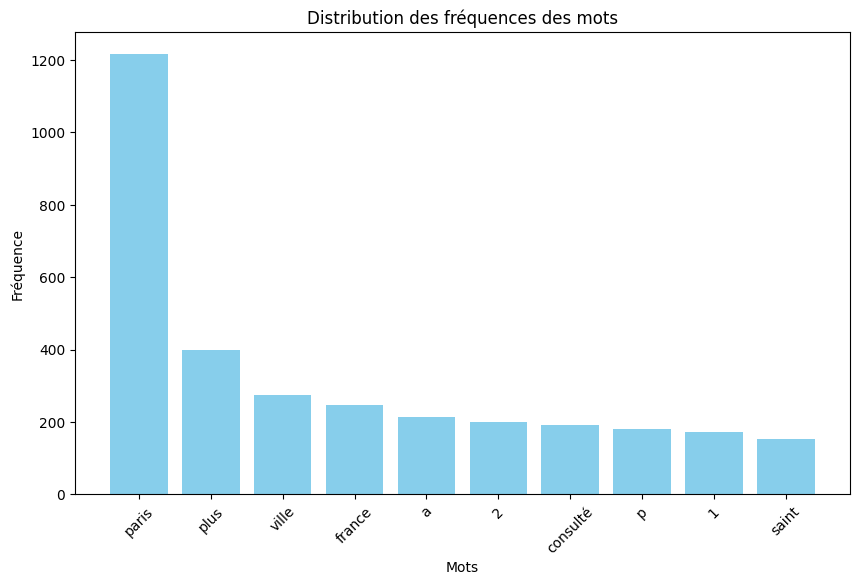

In [129]:
stop_words = set(stopwords.words('french'))
filtered_words = [token.text for token in doc if token.text not in stop_words and not token.is_punct]

word_counts = Counter(filtered_words)

most_common_words = word_counts.most_common(10)
print("Les 10 mots les plus fréquents :")
for word, count in most_common_words:
    print(f"{word}: {count}")

words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.title('Distribution des fréquences des mots')
plt.xticks(rotation=45)
plt.show()

#### Étape 9 : Créer un Nuage de Mots

Générez un nuage de mots pour visualiser les mots les plus fréquents.

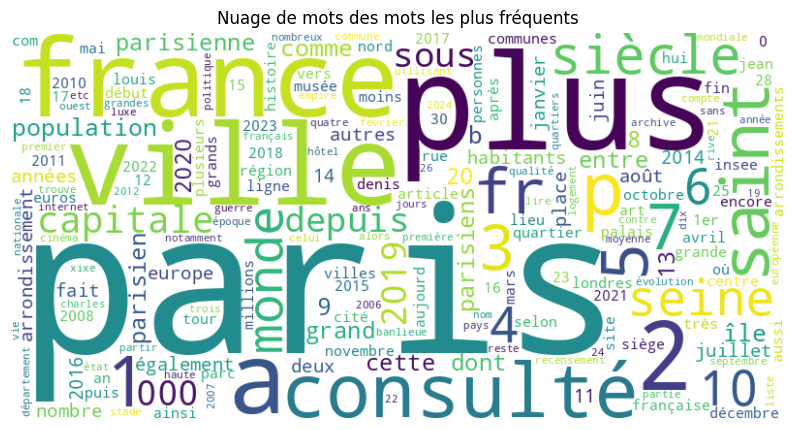

In [130]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots des mots les plus fréquents")
plt.show()

#### Étape 10 : Visualisation des Entités Nommées

Visualisez les entités nommées reconnues dans le texte à l'aide de Matplotlib.

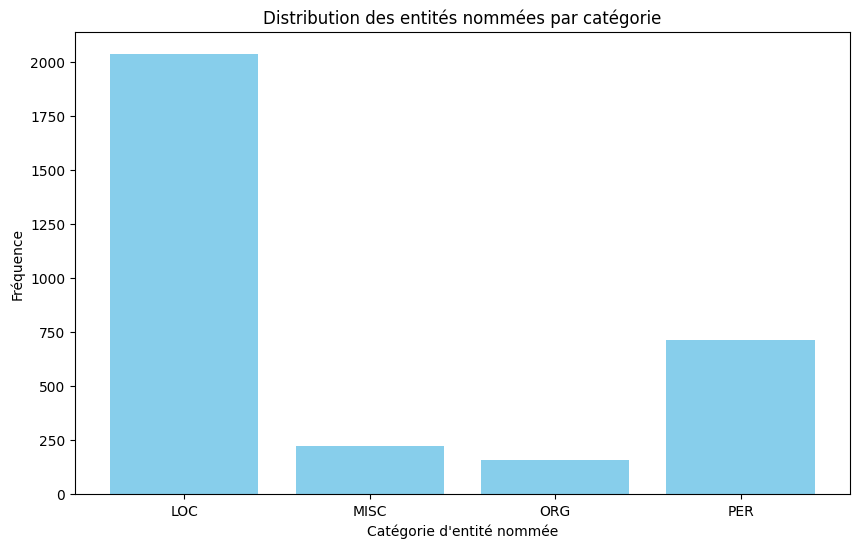

In [131]:
entities = [(ent.text, ent.label_) for ent in doc.ents]

entity_counts = Counter([ent[1] for ent in entities])

labels, counts = zip(*entity_counts.items())

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Catégorie d\'entité nommée')
plt.ylabel('Fréquence')
plt.title('Distribution des entités nommées par catégorie')
plt.show()


#### Étape 11 : Visualisation des Noms les Plus Courants

Visualisez les noms les plus courants dans le texte, ce qui peut fournir des informations sur les principaux sujets abordés.

Les 10 noms les plus fréquents :
paris: 860
île de france: 50
france: 47
de france: 43
ville de paris: 41
europe: 41
londres: 36
seine: 34
la seine: 27
la france: 27


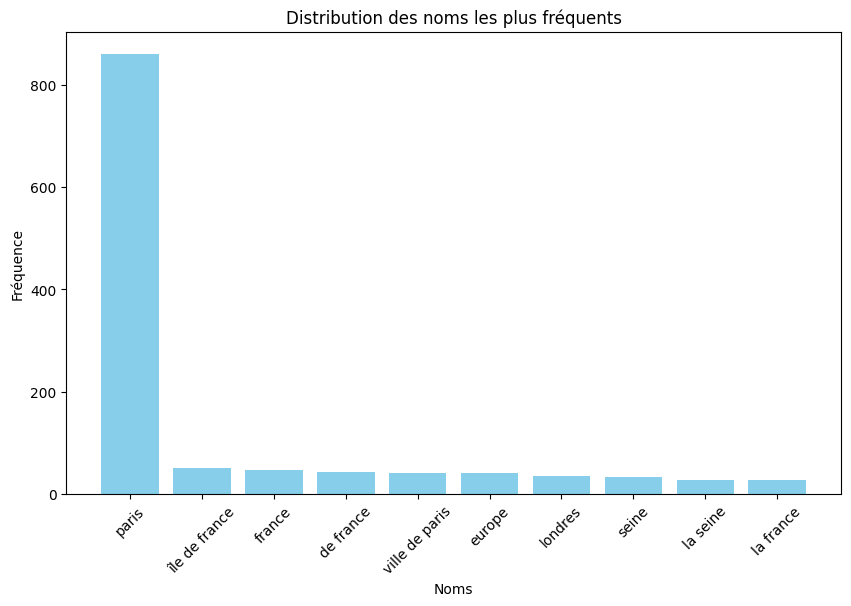

In [132]:
names = [ent.text for ent in doc.ents if ent.label_ in ['PER', 'LOC']]

name_counts = Counter(names)

most_common_names = name_counts.most_common(10)
print("Les 10 noms les plus fréquents :")
for name, count in most_common_names:
    print(f"{name}: {count}")

names, counts = zip(*most_common_names)
plt.figure(figsize=(10, 6))
plt.bar(names, counts, color='skyblue')
plt.xlabel('Noms')
plt.ylabel('Fréquence')
plt.title('Distribution des noms les plus fréquents')
plt.xticks(rotation=45)
plt.show()